## Summary

---

## Imports

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

## Load data

In [2]:
NOTEBOOK_DIR = Path("xx_el2_calibration").resolve()
NOTEBOOK_DIR.mkdir(exist_ok=True)

NOTEBOOK_DIR

PosixPath('/home/kimlab5/strokach/workspace/elaspic/elaspic2-cagi6/notebooks/xx_el2_calibration')

In [3]:
with NOTEBOOK_DIR.joinpath("sars-spike-co.html").open("rt") as fin:
    data = fin.read()

In [4]:
data_df = pd.read_html(data)[0]

data_df.head()

,Unnamed: 0,Protein,Mutation,Type,Template,Seq iden,Align score,Model,Provean,ΔΔG,EL2
0,1,6zoy-rbd.pdb,A24C,Core,INPUTA,1.0,1.0,-0.483,-2.137,0.240,1.659
1,1,6zoy-rbd.pdb,A24D,Core,INPUTA,1.0,1.0,-0.483,-1.223,0.270,0.818
2,1,6zoy-rbd.pdb,A24E,Core,INPUTA,1.0,1.0,-0.483,-1.360,0.183,1.420
3,1,6zoy-rbd.pdb,A24F,Core,INPUTA,1.0,1.0,-0.483,-2.775,0.276,2.384
4,1,6zoy-rbd.pdb,A24G,Core,INPUTA,1.0,1.0,-0.483,-0.858,0.499,0.261


In [5]:
data2_df = pd.read_csv(
    NOTEBOOK_DIR.joinpath("sars-spike-co-simpleresults.txt"), sep="\t", na_values="None"
)
data2_df = data2_df.dropna(subset=["ProtBert_score", "ProteinSolver_score", "EL2_score"])

data2_df.head()

,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Interactor_UniProt_ID,Final_ddG,ProtBert_score,ProteinSolver_score,EL2_score
0,6zoy-rbd.pdb,spike-sars2-co,A115C,done,core,-,-,-,-,0.557757,0.050039,0.493000,1.684530
1,6zoy-rbd.pdb,spike-sars2-co,A115D,done,core,-,-,-,-,1.839001,-0.002905,0.490849,2.342834
2,6zoy-rbd.pdb,spike-sars2-co,A115E,done,core,-,-,-,-,2.431744,-0.007556,0.489893,2.011936
3,6zoy-rbd.pdb,spike-sars2-co,A115F,done,core,-,-,-,-,0.249638,0.018772,0.504858,2.675086
4,6zoy-rbd.pdb,spike-sars2-co,A115G,done,core,-,-,-,-,0.849054,-0.011412,0.452892,1.261279


## Visualize

In [6]:
stats.spearmanr(data_df["ΔΔG"], data_df["EL2"])

SpearmanrResult(correlation=0.5062427416284822, pvalue=3.6603529136619595e-245)

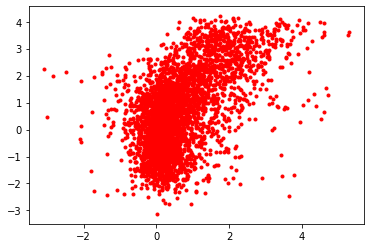

In [7]:
fig, ax = plt.subplots()

ax.plot(data_df["ΔΔG"], data_df["EL2"], "r.")

In [8]:
stats.spearmanr(data2_df["Final_ddG"], data2_df["EL2_score"])

SpearmanrResult(correlation=0.5063089508754804, pvalue=3.5801756805046194e-245)

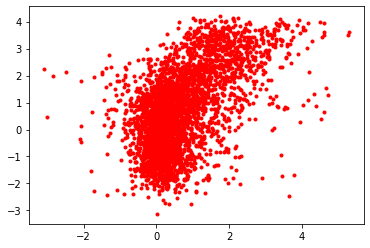

In [9]:
fig, ax = plt.subplots()

ax.plot(data2_df["Final_ddG"], data2_df["EL2_score"], "r.")

In [10]:
stats.spearmanr(data2_df["Final_ddG"], data2_df["ProteinSolver_score"])

SpearmanrResult(correlation=0.42850869850523493, pvalue=1.3614197362850844e-168)

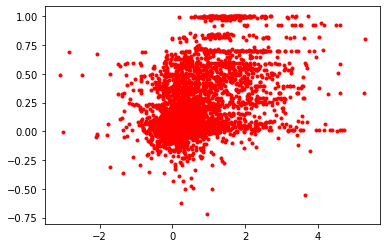

In [11]:
fig, ax = plt.subplots()

ax.plot(data2_df["Final_ddG"], data2_df["ProteinSolver_score"], "r.")

In [12]:
stats.spearmanr(data2_df["Final_ddG"], data2_df["ProtBert_score"])

SpearmanrResult(correlation=-0.19335056189613636, pvalue=3.829759863293595e-33)

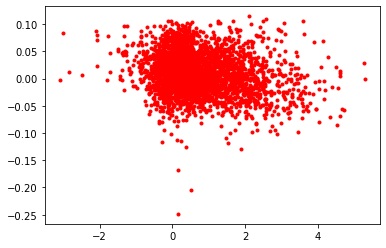

In [13]:
fig, ax = plt.subplots()

ax.plot(data2_df["Final_ddG"].values, data2_df["ProtBert_score"].values, "r.")